# Titanic - Machine Learning Project

### About The Dataset

The project's objective is to assess a range of passenger attributes, including names, ages, genders, socio-economic classes, and others, in order to make predictions about their chances of survival. The dataset used in this analysis was obtained from Kaggle and consists of 891 rows and 12 columns. Within these columns, there are 11 predictor variables and one target variable, namely the 'survived' column.

#### Data Dictionary
|Variable|Definition|Key|
|--------|----------|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex	|
|Age|	Age in years|	
|sibsp	|Number of siblings / spouses aboard the Titanic	|
|parch	|Number of parents / children aboard the Titanic	|
|ticket	|Ticket number	|
|fare	|Passenger fare	|
|cabin	|Cabin number	|
|embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
df=pd.read_csv(r"C:\Users\maram\Downloads\Titanic-Dataset.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [4]:
df.shape

(891, 12)

### Data Cleaning

In [5]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [7]:
df['Embarked']=df['Embarked'].replace(np.nan, 'S')

In [8]:
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

### Data Preprocessing

In [9]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [10]:
#Age
df['Age']=df['Age'].astype(int)

In [11]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [12]:
#Sex
sex_data_dummies=pd.get_dummies(df['Sex'],prefix='Gender',prefix_sep=':')

In [13]:
df=pd.concat([sex_data_dummies,df],axis=1)

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df.columns.values

array(['Gender:female', 'Gender:male', 'Survived', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Embarked'], dtype=object)

### Data Exploratory

In [16]:
df.columns

Index(['Gender:female', 'Gender:male', 'Survived', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype='object')

##### Percentage of Male/Female

In [17]:
Mcount=0
Mgender=df['Gender:male']
for i in range(len(Mgender)) :
    if Mgender[i]==1 :
        Mcount=Mcount+1
Mcount
per_M=(Mcount/len(Mgender))*100
print('Percentage of Male:',per_M)

Percentage of Male: 64.75869809203144


In [18]:
Fcount=0
Fgender=df['Gender:female']
for i in range(len(Fgender)) :
    if Fgender[i]==1 :
        Fcount=Fcount+1
Mcount
per_F=(Fcount/len(Fgender))*100
print('Percentage of Female:',per_F)

Percentage of Female: 35.24130190796858


<function matplotlib.pyplot.show(close=None, block=None)>

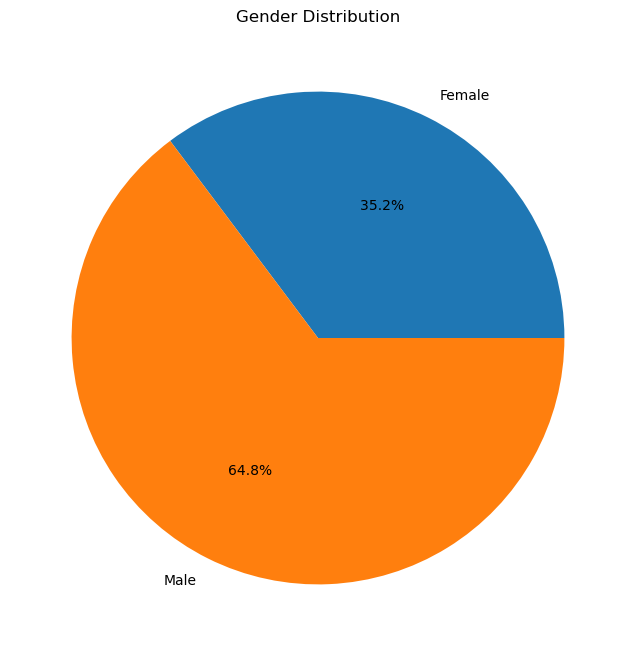

In [19]:
plt.figure(figsize=(8, 8))
values=[per_F,per_M]
labels=['Female','Male']
plt.pie(values, labels=labels, autopct='%1.1f%% ')
plt.title('Gender Distribution')
plt.show

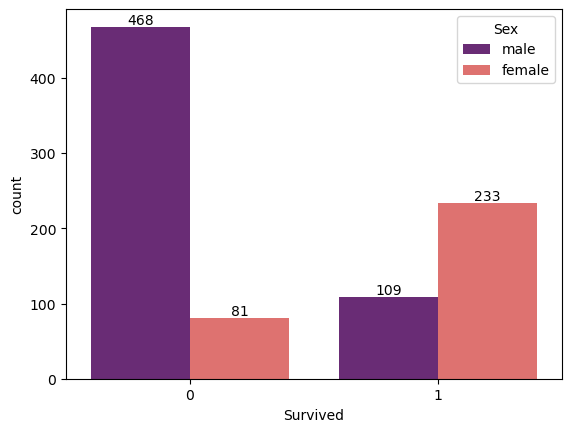

In [20]:
ax=sns.countplot(x='Survived',data=df,palette="magma",hue="Sex")
for bars in ax.containers:
    ax.bar_label(bars)

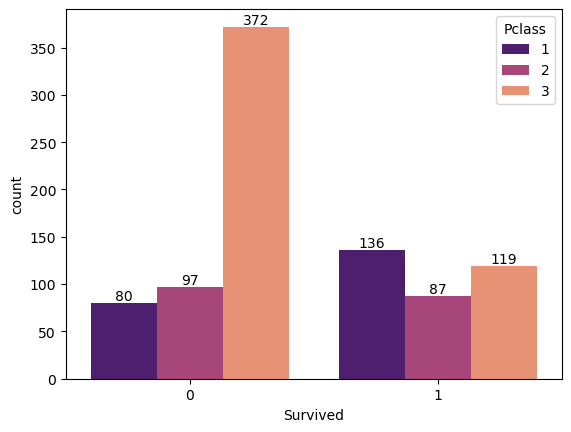

In [21]:
ax=sns.countplot(x='Survived',data=df,palette="magma",hue="Pclass")
for bars in ax.containers:
    ax.bar_label(bars)

In [22]:
#Correlation Mtarix between the features
df.corr(method='pearson') 

C:\Users\maram\AppData\Local\Temp\ipykernel_14916\1587505417.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Gender:female,Gender:male,Survived,Pclass,Age,SibSp,Parch,Fare
Gender:female,1.000000,-1.000000,0.543351,-0.131900,-0.080750,0.114631,0.245489,0.182333
Gender:male,-1.000000,1.000000,-0.543351,0.131900,0.080750,-0.114631,-0.245489,-0.182333
Survived,0.543351,-0.543351,1.000000,-0.338481,-0.064909,-0.035322,0.081629,0.257307
Pclass,-0.131900,0.131900,-0.338481,1.000000,-0.339999,0.083081,0.018443,-0.549500
Age,-0.080750,0.080750,-0.064909,-0.339999,1.000000,-0.233066,-0.172745,0.096838
SibSp,0.114631,-0.114631,-0.035322,0.083081,-0.233066,1.000000,0.414838,0.159651
Parch,0.245489,-0.245489,0.081629,0.018443,-0.172745,0.414838,1.000000,0.216225
Fare,0.182333,-0.182333,0.257307,-0.549500,0.096838,0.159651,0.216225,1.000000


C:\Users\maram\AppData\Local\Temp\ipykernel_14916\4014866372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<Axes: >

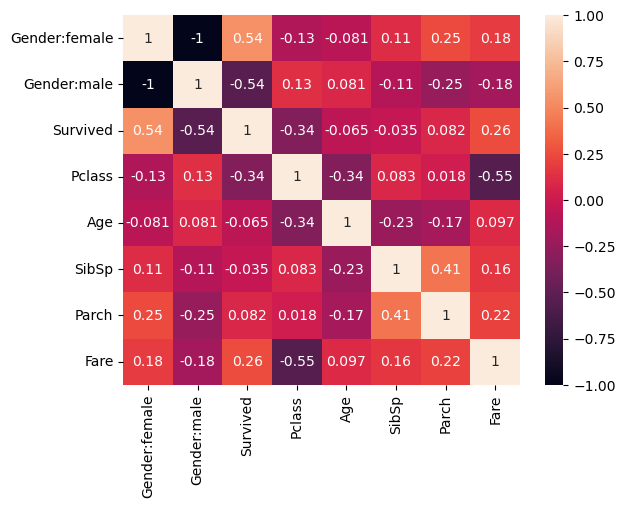

In [23]:
sns.heatmap(df.corr(), annot= True)

### Building the Model

In [24]:
df.drop(['Sex'],axis=1,inplace=True)

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['S','C','Q'])
df['Embarked'] = le.transform(df['Embarked'])

In [26]:
y = df['Survived']
x = df.drop(columns=['Survived'])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
LG=LogisticRegression()

In [31]:
LG.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=LG.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0], dtype=int64)

In [33]:
from sklearn import metrics

# Model Accuracy
print("Accuracy of Logistic Regression Model:",metrics.accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression Model: 0.7910447761194029


#### Naive Bayes Model


In [55]:
from sklearn.model_selection import train_test_split
x= df.drop(['Survived'],axis =1)
y=df['Survived']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

In [56]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [57]:
model.fit(xTrain,yTrain)

GaussianNB()

In [58]:
predicted= model.predict(xTest)

In [59]:
print("Predicted Value:", predicted)

Predicted Value: [0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0]


In [60]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(yTest, predicted))

Accuracy: 0.8022388059701493


#### K-Nearest Neighbor

In [63]:
from sklearn.model_selection import train_test_split
x= df.drop(['Survived'],axis =1)
y=df['Survived']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [65]:
knn.fit(xTrain,yTrain)

KNeighborsClassifier()

In [66]:
predictedknn= model.predict(xTest)

In [67]:
print("Predicted Value:", predictedknn)

Predicted Value: [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0
 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1
 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0]


In [68]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(yTest, predictedknn))

Accuracy: 0.7761194029850746


#### Decision Tree Model 

In [71]:
from sklearn.model_selection import train_test_split
x= df.drop(['Survived'],axis =1)
y=df['Survived']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [73]:
dtc.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [74]:
predicteddtc= dtc.predict(xTest)

In [75]:
print("Predicted Value:", predicteddtc)

Predicted Value: [0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1
 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 1 1 0 0]


In [76]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(yTest, predicteddtc))

Accuracy: 0.8208955223880597


### Conclusion

The Decision Tree model achieved the highest performance score when evaluated alongside K-Nearest Neighbors (KNN), Naive Bayes, and Logistic Regression models. Therefore, based on the results of our analysis, we can conclude that the Decision Tree model is the most suitable choice for this specific dataset.